<a href="https://colab.research.google.com/github/qnrua0511/bikeseoul/blob/main/%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [1]:
import pandas as pd

In [2]:
usage_12=pd.read_csv('usage_12.csv')

In [3]:
usage_12.head()

,대여년월,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분)
0,202312,102,망원역 1번출구 앞,일일권,20대,38,2338.03,23.61,101761.54,1414
1,202312,102,망원역 1번출구 앞,일일권,30대,20,1272.34,10.82,51448.03,490
2,202312,102,망원역 1번출구 앞,일일권,40대,3,149.55,1.39,5993.29,42
3,202312,102,망원역 1번출구 앞,일일권,60대,1,121.97,1.62,7000.00,51
4,202312,102,망원역 1번출구 앞,일일권,~10대,1,44.26,0.48,2070.00,16


In [4]:
rental_shop_add=pd.read_csv('rental_shop_add.csv')

In [5]:
rental_shop_add.head()

,대여소번호,대여소명,자치구,상세주소,위도,경도
0,301,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130 경복궁역 7번출구 앞,37.575794,126.971451
1,302,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130 경복궁역 4번출구 뒤,37.575947,126.974060
2,303,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189 세종로공원,37.571770,126.974663
3,305,종로구청 옆,종로구,서울특별시 종로구 세종로 84-1,37.572559,126.978332
4,307,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55 서울역사박물관 앞,37.570000,126.971100


In [6]:
merged_df = usage_12.merge(rental_shop_add[['대여소번호', '자치구']], on='대여소번호', how='left')
usage_12['자치구'] = merged_df['자치구']
usage_12.head()

,대여년월,대여소번호,대여소명,대여구분코드,연령대코드,이용건수,운동량,탄소량,이용거리(M),이용시간(분),자치구
0,202312,102,망원역 1번출구 앞,일일권,20대,38,2338.03,23.61,101761.54,1414,마포구
1,202312,102,망원역 1번출구 앞,일일권,30대,20,1272.34,10.82,51448.03,490,마포구
2,202312,102,망원역 1번출구 앞,일일권,40대,3,149.55,1.39,5993.29,42,마포구
3,202312,102,망원역 1번출구 앞,일일권,60대,1,121.97,1.62,7000.00,51,마포구
4,202312,102,망원역 1번출구 앞,일일권,~10대,1,44.26,0.48,2070.00,16,마포구


In [7]:
region_usage=pd.DataFrame(usage_12.groupby('자치구').이용건수.sum()).reset_index()

In [8]:
region_usage

,자치구,이용건수
0,강남구,63129
1,강동구,87333
2,강북구,30978
3,강서구,272404
4,관악구,48019
5,광진구,101353
6,구로구,85072
7,금천구,38275
8,노원구,133657
9,도봉구,45997


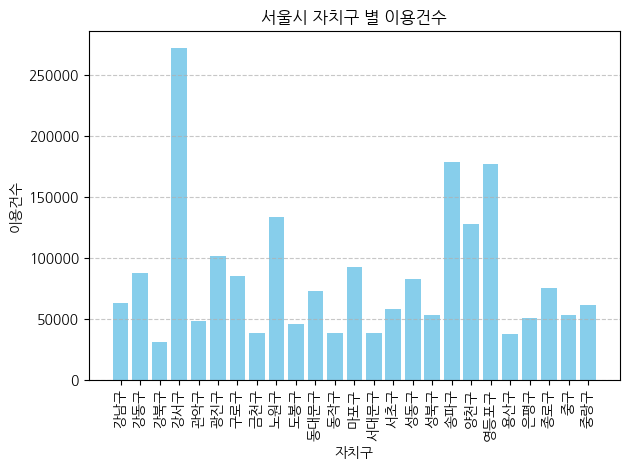

In [10]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.bar(region_usage['자치구'], region_usage['이용건수'], color='skyblue')
plt.xlabel('자치구')
plt.ylabel('이용건수')
plt.title('서울시 자치구 별 이용건수')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

12월 달에 강서구에서 가장 많은 이용이 있었다는 것을 확인할 수 있음